In [ ]:
# Syntax updated for newer qiskit libraries

In [93]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/ePr2MgQkqL0", width=1920/4, height=1080/4)
#<iframe width="560" height="315" src="https://www.youtube.com/embed/ePr2MgQkqL0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [23]:
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover, AmplificationProblem

from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.exceptions import MissingOptionalLibraryError

In [94]:
log_expr = '((x & y) | (z & t)) & ~(y & t)'
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=4096)

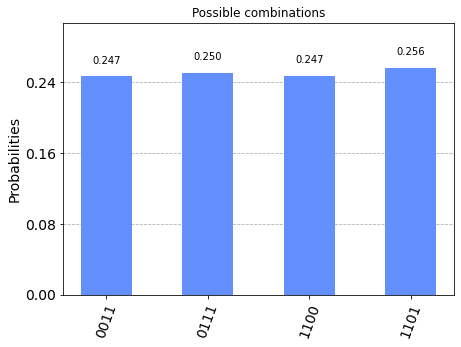

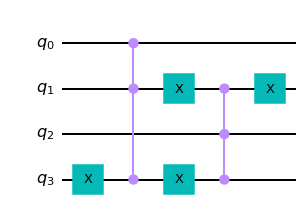

In [98]:
try:
    oracle = PhaseOracle(log_expr)
    
    if oracle is not None:
        problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    
    grover = Grover(quantum_instance = quantum_instance)
    result = grover.amplify(problem)
    
    if result is not None:
        display(plot_histogram(result.circuit_results, title = 'Possible combinations', bar_labels=True))
        display(problem.grover_operator.oracle.decompose().draw(output='mpl'))

except MissingOptionalLibraryError as ex:
    print(ex)

In [99]:
print(result)

{   'assignment': '1101',
    'circuit_results': [   {   '0011': 1010,
                               '0111': 1026,
                               '1100': 1013,
                               '1101': 1047}],
    'iterations': [1],
    'max_probability': 0.255615234375,
    'oracle_evaluation': True,
    'top_measurement': '1101'}


In [100]:
from qiskit.tools.jupyter import *
%qiskit_version_table